# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observations
* In the northern hemisphere as the latitude increases from 0 to 90 the colder the max Temperature becomes
* In the southern hemisphere as the latitude decreases from 0 to -90 the colder the max Temperature becomes
* There is no correlation between the wind speed and the temperature for both northern and southern hemispheres

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from datetime import date

# Import API key
from config import openweather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Open weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = [] 
lat_list = [] 
Lng_list = [] 
Temp_list = [] 
Wind_list = []
i=1

# Build query URL and request your results in Celsius
print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for city in cities:
    print(f'Processing Record {i}| {city}')
    query_url = f"{url}appid={openweather_key}&q={city}&units={units}"
    i = i +1
    # Get weather data
    weather_json = requests.get(query_url).json()
    try:
        city_list.append(weather_json['name'])
        cloudiness_list.append(weather_json['clouds']['all'])
        country_list.append(weather_json['sys']['country'])
        date_list.append(weather_json['dt'])
        humidity_list.append(weather_json['main']['humidity'])
        lat_list.append(weather_json['coord']['lat'])
        Lng_list.append(weather_json['coord']['lon'])
        Temp_list.append(weather_json['main']['temp_max'])
        Wind_list.append(weather_json['wind']['speed'])
        time.sleep(1)
    # Handle exceptions for a city thats not found
    except:
        # Append null values
        print(f"{city} not found. Skipping...")
        pass    


Beginning Data Retrieval
-----------------------------
Processing Record 1| strezhevoy
Processing Record 2| kapaa
Processing Record 3| yangambi
Processing Record 4| saint-philippe
Processing Record 5| achacachi
Processing Record 6| ushuaia
Processing Record 7| alekseyevka
Processing Record 8| bluff
Processing Record 9| busselton
Processing Record 10| nikolskoye
Processing Record 11| whyalla
Processing Record 12| tuktoyaktuk
Processing Record 13| kota kinabalu
Processing Record 14| ahuimanu
Processing Record 15| porbandar
Processing Record 16| lorengau
Processing Record 17| pevek
Processing Record 18| cape town
Processing Record 19| ayagoz
Processing Record 20| ancud
Processing Record 21| okha
Processing Record 22| atuona
Processing Record 23| marsh harbour
Processing Record 24| saleaula
saleaula not found. Skipping...
Processing Record 25| clyde river
Processing Record 26| iskateley
Processing Record 27| tabou
Processing Record 28| kamaishi
Processing Record 29| norman wells
Processing

Processing Record 233| aquiraz
Processing Record 234| russkiy aktash
Processing Record 235| jutai
Processing Record 236| faanui
Processing Record 237| yulara
Processing Record 238| turukhansk
Processing Record 239| palm valley
Processing Record 240| bukachacha
Processing Record 241| axim
Processing Record 242| paamiut
Processing Record 243| olafsvik
Processing Record 244| kommunisticheskiy
Processing Record 245| acari
Processing Record 246| pangody
Processing Record 247| jiddah
jiddah not found. Skipping...
Processing Record 248| kuching
Processing Record 249| vardo
Processing Record 250| flinders
Processing Record 251| vladivostok
Processing Record 252| plettenberg bay
Processing Record 253| pirapo
Processing Record 254| jeremie
Processing Record 255| lamesa
Processing Record 256| okhotsk
Processing Record 257| kulhudhuffushi
Processing Record 258| tsihombe
tsihombe not found. Skipping...
Processing Record 259| constitucion
Processing Record 260| brownsville
Processing Record 261| thu

Processing Record 463| sidi ali
Processing Record 464| sao gabriel da cachoeira
Processing Record 465| valparaiso
Processing Record 466| kakanj
Processing Record 467| hearst
Processing Record 468| turtas
Processing Record 469| vanimo
Processing Record 470| nome
Processing Record 471| gizo
Processing Record 472| aracati
Processing Record 473| ouadda
Processing Record 474| meyungs
meyungs not found. Skipping...
Processing Record 475| vaitupu
vaitupu not found. Skipping...
Processing Record 476| varzea da palma
Processing Record 477| ji-parana
ji-parana not found. Skipping...
Processing Record 478| pinawa
Processing Record 479| ouahigouya
Processing Record 480| arona
Processing Record 481| neepawa
Processing Record 482| kenai
Processing Record 483| ngunguru
Processing Record 484| kayerkan
Processing Record 485| bloomingdale
Processing Record 486| paita
Processing Record 487| guarapari
Processing Record 488| nakhon phanom
Processing Record 489| santa cruz verapaz
Processing Record 490| hom

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
#Exporting the city data into a .csv.
city_dict = {
    "city" : city_list,
    "cloudiness":cloudiness_list,
    "country":country_list,
    "date" :date_list,
    "humidity":humidity_list,
    "lat":lat_list,
    "Lng":Lng_list,
    "Temp":Temp_list,
    "Wind":Wind_list
}

city_df = pd.DataFrame(city_dict)
city_df = city_df.dropna(how='any')
city_df.to_csv("cities.csv", encoding="utf-8", index=False) 

In [53]:
#Ge today date in the format we need
today_date = date.today().strftime("%m/%d/%y")

In [54]:
#Display the data frame
city_df 

,city,cloudiness,country,date,humidity,lat,Lng,Temp,Wind
0,Strezhevoy,90,RU,1579385670,92,60.73,77.59,8.60,4.47
1,Kapaa,75,US,1579385671,60,22.08,-159.32,75.20,17.22
2,Yangambi,89,CD,1579385672,92,0.81,24.43,71.02,2.71
3,Saint-Philippe,75,RE,1579385673,83,-21.36,55.77,80.60,5.82
4,Achacachi,100,BO,1579385674,94,-16.05,-68.68,38.28,9.64
...,...,...,...,...,...,...,...,...,...
551,Palmer,90,US,1579386275,85,42.16,-72.33,21.20,6.93
552,Koutiala,0,ML,1579386276,13,12.39,-5.46,72.10,9.26
553,Mecca,23,SA,1579386277,65,21.43,39.83,64.85,1.61
554,Prince Rupert,90,CA,1579386278,80,54.32,-130.32,35.60,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

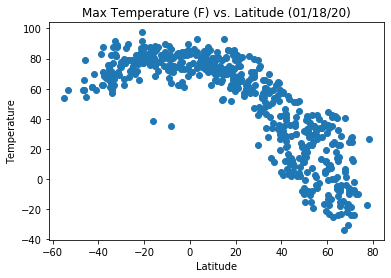

In [90]:
#Plot Temperature (F) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['Temp'])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title(f'Max Temperature (F) vs. Latitude ({today_date})')
plt.savefig(f"Images/Temperature Vs Latitude")
plt.show()

In [91]:
correlation = st.pearsonr(city_df['lat'],city_df['Temp'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.79


#### Analysis
* There is a negative correlation between the latitude and the temperature from both northern and southern hemispheres

#### Latitude vs. Humidity Plot

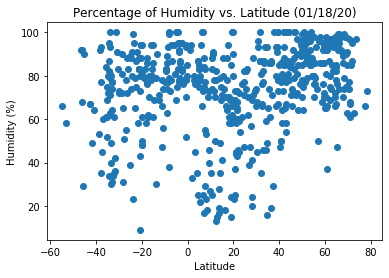

In [92]:
#Plot Humidity (%) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Percentage of Humidity vs. Latitude ({today_date})')
plt.savefig(f"Images/Humidity Vs Latitude")
plt.show()

In [93]:
correlation = st.pearsonr(city_df['lat'],city_df['humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.22


#### Analysis
* There is a weak correlation between the humidity % and the temperature from both northern and southern hemispheres

#### Latitude vs. Cloudiness Plot

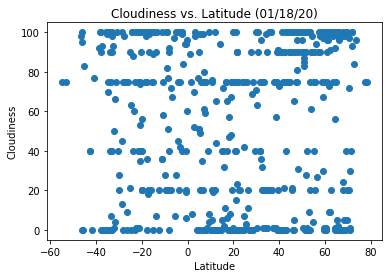

In [82]:
#Plot Cloudiness (%) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'Cloudiness vs. Latitude ({today_date})')
plt.savefig(f"Images/Cloudiness Vs Latitude")
plt.show()

In [83]:
correlation = st.pearsonr(city_df['lat'],city_df['cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.03


#### Analysis
* There is a very weak correlation between the cloudiness % and the temperature from both northern and southern hemispheres

#### Latitude vs. Wind Speed Plot

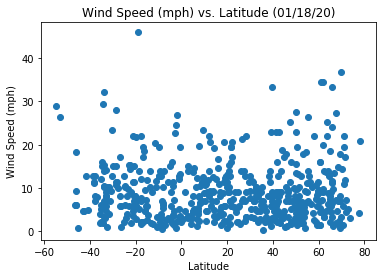

In [84]:
#Plot Wind Speed (mph) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['Wind'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Wind Speed (mph) vs. Latitude ({today_date})')
plt.savefig(f"Images/Wind Speed Vs Latitude")
plt.show()

In [85]:
correlation = st.pearsonr(city_df['lat'],city_df['Wind'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.0


#### Analysis
* There is no correlation between the wind speed and the temperature from both northern and southern hemispheres


## Linear Regression

In [86]:
# A function to create Linear Regression plots
def linear_regression_plotter(xaxis, yaxis):   
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xaxis, yaxis)
    regress_values = xaxis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xaxis, yaxis)
    plt.plot(xaxis,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"R squared: {rvalue}")


In [87]:
# Create Northern and Southern Hemisphere DataFrames
north_hemisphere_cities = city_df.loc[city_df['lat'] >= 0]
south_hemisphere_cities = city_df.loc[city_df['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: -0.8627516263338124


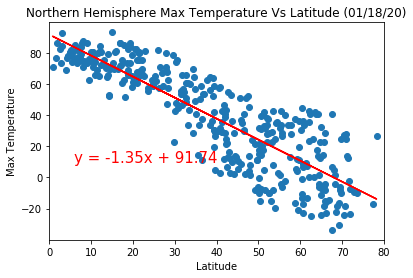

In [88]:
#Northern Hemisphere - Temperature (F) vs. Latitude
yaxis = north_hemisphere_cities['Temp']
xaxis = north_hemisphere_cities['lat']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Northern Hemisphere Max Temperature Vs Latitude ({today_date})')
plt.savefig(f"Images/Northern Hemisphere Max Temperature Vs Latitude")
plt.xlim(0,80)
plt.show()

#### Analysis
* There is a strong negative correlation between Max Temperature and the Latitude on the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.37910879214628745


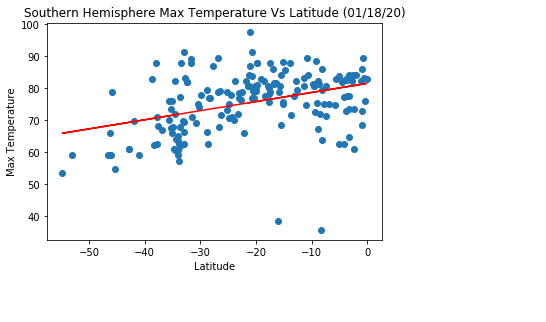

In [89]:
#Southern Hemisphere - Temperature (F) vs. Latitude
yaxis = south_hemisphere_cities['Temp']
xaxis = south_hemisphere_cities['lat']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Southern Hemisphere Max Temperature Vs Latitude ({today_date})')
plt.savefig(f"Images/Southern Hemisphere Max Temperature Vs Latitude")
plt.show()

#### Analysis
* There is a weak correlation between Max Temperature and the Latitude on the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.42693821815505417


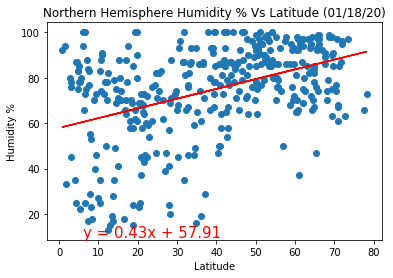

In [67]:
#Northern Hemisphere - Humidity (%)  vs. Latitude
yaxis = north_hemisphere_cities['humidity']
xaxis = north_hemisphere_cities['lat']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Northern Hemisphere Humidity % Vs Latitude ({today_date})')
plt.savefig(f"Images/Northern Hemisphere Humidity % Vs Latitude")
plt.show()

#### Analysis
* There is a weak correlation between Humidity and the Latitude on the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.2767751539154194


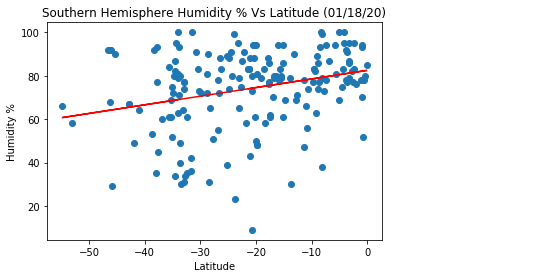

In [69]:
#Southern Hemisphere - Humidity (%)  vs. Latitude
yaxis = south_hemisphere_cities['humidity']
xaxis = south_hemisphere_cities['lat']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Southern Hemisphere Humidity % Vs Latitude ({today_date})')
plt.savefig(f"Images/Southern Hemisphere Humidity % Vs Latitude")
plt.show()

#### Analysis
* There is a very weak correlation between Humidity and the Latitude on the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.26744796603590487


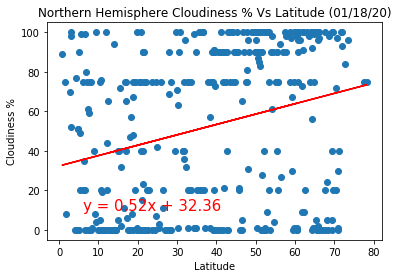

In [71]:
#Northern Hemisphere - Cloudiness (%)   vs. Latitude
yaxis = north_hemisphere_cities['cloudiness']
xaxis = north_hemisphere_cities['lat']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Northern Hemisphere Cloudiness % Vs Latitude ({today_date})')
plt.savefig(f"Images/Northern Hemisphere Cloudiness % Vs Latitude")
plt.show()

#### Analysis
* There is a very weak correlation between Cloudiness (%) and the Latitude on the Northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.04379937400695821


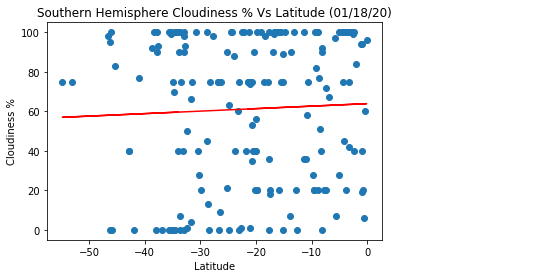

In [73]:
#Southern Hemisphere - Cloudiness (%)   vs. Latitude
yaxis = south_hemisphere_cities['cloudiness']
xaxis = south_hemisphere_cities['lat']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Southern Hemisphere Cloudiness % Vs Latitude ({today_date})')
plt.savefig(f"Images/Southern Hemisphere Cloudiness % Vs Latitude")
plt.show()

#### Analysis
* There is a very weak to no correlation between Cloudiness (%) and the Latitude on the Southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.10532747878161362


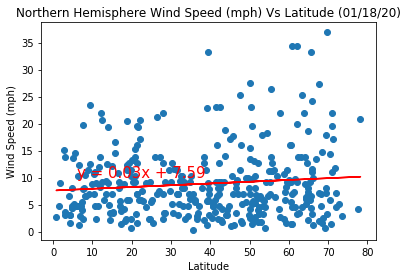

In [74]:
#Northern Hemisphere - Wind Speed (mph)   vs. Latitude
yaxis = north_hemisphere_cities['Wind']
xaxis = north_hemisphere_cities['lat']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Wind Speed (mph) Vs Latitude ({today_date})')
plt.savefig(f"Images/Northern Hemisphere Wind Speed % Vs Latitude")
plt.show()

#### Analysis
* There is a very weak correlation between Wind Speed and the Latitude on the Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.11044840248302698


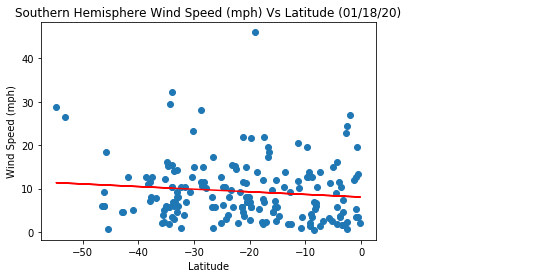

In [75]:
#Southern Hemisphere - Wind Speed (mph)   vs. Latitude
yaxis = south_hemisphere_cities['Wind']
xaxis = south_hemisphere_cities['lat']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Wind Speed (mph) Vs Latitude ({today_date})')
plt.savefig(f"Images/Southern Hemisphere Wind Speed % Vs Latitude")
plt.show()

#### Analysis
*  There is a negative correlation between Wind Speed and the Latitude on the Southern hemisphere.